In [1]:
from math import sqrt
from numpy import concatenate
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
py.init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


In [2]:
df=pd.read_csv("../Bitcoin_Prediction/bitcoin_price_Training - Training.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
Date          1556 non-null object
Open          1556 non-null float64
High          1556 non-null float64
Low           1556 non-null float64
Close         1556 non-null float64
Volume        1556 non-null object
Market Cap    1556 non-null object
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [4]:
df['Mean']=(df['High']+df['Low'])/2

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Mean
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",2805.115
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2701.690
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2750.780
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2788.590
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2611.330


In [6]:
from dateutil.parser import parse
#DATE 숫자형로 바꾸기
for row in range (len(df)):
    tf=parse(df['Date'].iloc[row])
    converted_date=tf.strftime('%Y-%m-%d')
    df['Date'].iloc[row]=converted_date
    
df.head()

C:\Users\jlee1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Date,Open,High,Low,Close,Volume,Market Cap,Mean
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",2805.115
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2701.690
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2750.780
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2788.590
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2611.330


In [7]:
btc_trace = go.Scatter(x=df['Date'], y=df['Mean'], name= 'Price')
py.iplot([btc_trace])

In [8]:
corr_matrix=df.corr()
corr_matrix['Mean'].sort_values(ascending=False)

Mean     1.000000
High     0.999376
Close    0.999342
Low      0.999282
Open     0.999035
Name: Mean, dtype: float64

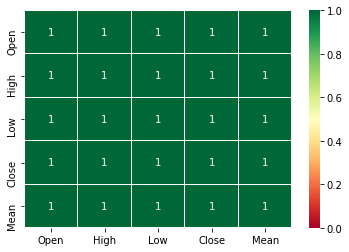

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Scale AND Split Dataset

In [10]:
df.describe

<bound method NDFrame.describe of             Date     Open     High      Low    Close         Volume  \
0     2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000   
1     2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000   
2     2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000   
3     2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4     2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000   
5     2017-07-26  2577.77  2610.76  2450.80  2529.45    937,404,000   
6     2017-07-25  2757.50  2768.08  2480.96  2576.48  1,460,090,000   
7     2017-07-24  2732.70  2777.26  2699.19  2754.86    866,474,000   
8     2017-07-23  2808.10  2832.18  2653.94  2730.40  1,072,840,000   
9     2017-07-22  2668.63  2862.42  2657.71  2810.12  1,177,130,000   
10    2017-07-21  2838.41  2838.41  2621.85  2667.76  1,489,450,000   
11    2017-07-20  2269.89  2900.70  2269.89  2817.60  2,249,260,000   
12    2017-07-19  2323.08  2397.17  2260.23

In [11]:
from sklearn.preprocessing import MinMaxScaler
values = df["Mean"].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1244 312


In [13]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [14]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1243
311


In [15]:
trainX[:5]

array([[0.96016467],
       [0.9238494 ],
       [0.94108623],
       [0.95436233],
       [0.8921216 ]], dtype=float32)

In [16]:
trial=scaler.inverse_transform(trainX)
trial[:5]

array([[2805.115],
       [2701.69 ],
       [2750.78 ],
       [2788.59 ],
       [2611.33 ]], dtype=float32)

# KERAS -변수 1개씩

In [17]:
#모델링을 위해 reshape
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [18]:
trainX[:5]

array([[[0.96016467]],

       [[0.9238494 ]],

       [[0.94108623]],

       [[0.95436233]],

       [[0.8921216 ]]], dtype=float32)

In [19]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

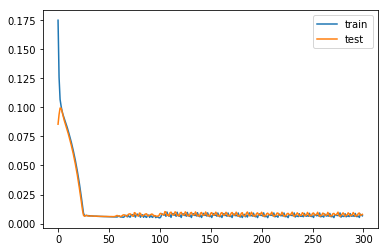

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

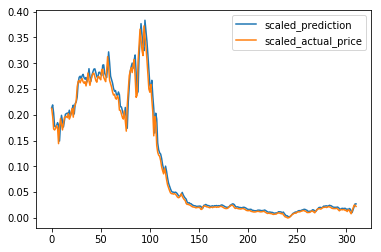

In [21]:
yhat = model.predict(testX)
plt.plot(yhat, label='scaled_prediction')
plt.plot(testY, label='scaled_actual_price')
plt.legend()
plt.show()

In [22]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [23]:
testY_inverse[:5]

array([[675.95 ],
       [631.715],
       [561.875],
       [556.335],
       [564.655]], dtype=float32)

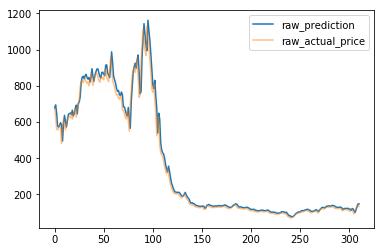

In [24]:
plt.plot(yhat_inverse, label='raw_prediction')
plt.plot(testY_inverse, label='raw_actual_price', alpha=0.5)
plt.legend()
plt.show()

In [25]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
rmse

36.9661215253237

In [26]:
#add dates
predictDates = df.tail(len(testX)).index

#Reshape testY and yhat for plotly
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

In [27]:
testY_inverse[:5]

array([[675.95 ],
       [631.715],
       [561.875],
       [556.335],
       [564.655]], dtype=float32)

In [28]:
testY_reshape[:5]

array([675.95 , 631.715, 561.875, 556.335, 564.655], dtype=float32)

In [29]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

# 철강 데이터 접근 방식 -> convert series to supervised learning 

In [30]:
#array형태로 치환
df=df[df.Volume != '-']
values = df[['Mean'] + ['High'] +['Low']].values
values[:5]

array([[2805.115, 2889.62 , 2720.61 ],
       [2701.69 , 2758.53 , 2644.85 ],
       [2750.78 , 2808.76 , 2692.8  ],
       [2788.59 , 2897.45 , 2679.73 ],
       [2611.33 , 2693.32 , 2529.34 ]])

In [31]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Mean
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",2805.115
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2701.690
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2750.780
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2788.590
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2611.330


In [32]:
# df.shift(-1).head()

In [33]:
# df.shift(2).head()

In [34]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [35]:
values = values.astype('float32')

In [36]:
values=values[:-3] #na 제거
values
print(values.shape[0],values.shape[1])
print (values[:5])

1310 3
[[2805.115 2889.62  2720.61 ]
 [2701.69  2758.53  2644.85 ]
 [2750.78  2808.76  2692.8  ]
 [2788.59  2897.45  2679.73 ]
 [2611.33  2693.32  2529.34 ]]


In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled[:5]

array([[0.9583037 , 0.9604438 , 0.95506966],
       [0.9202919 , 0.9134275 , 0.92668474],
       [0.938334  , 0.9314428 , 0.9446502 ],
       [0.95223033, 0.9632521 , 0.9397532 ],
       [0.88708186, 0.8900395 , 0.8834067 ]], dtype=float32)

In [38]:
reframed = series_to_supervised(scaled, 5, 1)
reframed.head()

,var1(t-5),var2(t-5),var3(t-5),var1(t-4),var2(t-4),var3(t-4),var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t),var2(t),var3(t)
5,0.958304,0.960444,0.955070,0.920292,0.913427,0.926685,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980
6,0.920292,0.913427,0.926685,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280
7,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044
8,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044,0.935497,0.939843,0.930090
9,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044,0.935497,0.939843,0.930090,0.941746,0.950688,0.931503


In [39]:
reframed.drop(reframed.columns[[16,17]], axis=1, inplace=True)
reframed.head()

,var1(t-5),var2(t-5),var3(t-5),var1(t-4),var2(t-4),var3(t-4),var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t)
5,0.958304,0.960444,0.955070,0.920292,0.913427,0.926685,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477
6,0.920292,0.913427,0.926685,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930
7,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720
8,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044,0.935497
9,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044,0.935497,0.939843,0.930090,0.941746


In [40]:
reframed.columns = ['Mean(t-5)', 'High(t-5)', 'Low(t-5)', 'Mean(t-4)', 'High(t-4)', 'Low(t-4)', 'Mean(t-3)', 'High(t-3)', 'Low(t-3)', 'Mean(t-2)', 'High(t-2)', 'Low(t-2)', 'Mean(t-1)', 'High(t-1)', 'Low(t-1)', 'Mean(t)' ]
reframed.head()

,Mean(t-5),High(t-5),Low(t-5),Mean(t-4),High(t-4),Low(t-4),Mean(t-3),High(t-3),Low(t-3),Mean(t-2),High(t-2),Low(t-2),Mean(t-1),High(t-1),Low(t-1),Mean(t)
5,0.958304,0.960444,0.955070,0.920292,0.913427,0.926685,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477
6,0.920292,0.913427,0.926685,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930
7,0.938334,0.931443,0.944650,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720
8,0.952230,0.963252,0.939753,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044,0.935497
9,0.887082,0.890040,0.883407,0.857477,0.860429,0.853980,0.891930,0.916853,0.865280,0.933720,0.920145,0.947044,0.935497,0.939843,0.930090,0.941746


In [41]:
values = reframed.values

n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
print(train_X.shape[0],train_X.shape[1])
train_X[:5]

913 15


array([[0.9583037 , 0.9604438 , 0.95506966, 0.9202919 , 0.9134275 ,
        0.92668474, 0.938334  , 0.9314428 , 0.9446502 , 0.95223033,
        0.9632521 , 0.9397532 , 0.88708186, 0.8900395 , 0.8834067 ],
       [0.9202919 , 0.9134275 , 0.92668474, 0.938334  , 0.9314428 ,
        0.9446502 , 0.95223033, 0.9632521 , 0.9397532 , 0.88708186,
        0.8900395 , 0.8834067 , 0.8574773 , 0.86042875, 0.8539801 ],
       [0.938334  , 0.9314428 , 0.9446502 , 0.95223033, 0.9632521 ,
        0.9397532 , 0.88708186, 0.8900395 , 0.8834067 , 0.8574773 ,
        0.86042875, 0.8539801 , 0.8919296 , 0.91685265, 0.86528015],
       [0.95223033, 0.9632521 , 0.9397532 , 0.88708186, 0.8900395 ,
        0.8834067 , 0.8574773 , 0.86042875, 0.8539801 , 0.8919296 ,
        0.91685265, 0.86528015, 0.93371964, 0.9201451 , 0.94704425],
       [0.88708186, 0.8900395 , 0.8834067 , 0.8574773 , 0.86042875,
        0.8539801 , 0.8919296 , 0.91685265, 0.86528015, 0.93371964,
        0.9201451 , 0.94704425, 0.9354967 , 

In [42]:
# 모델링을 위해 3차원 변신 [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(913, 1, 15) (913,) (392, 1, 15) (392,)


In [43]:
train_X[:5]

array([[[0.9583037 , 0.9604438 , 0.95506966, 0.9202919 , 0.9134275 ,
         0.92668474, 0.938334  , 0.9314428 , 0.9446502 , 0.95223033,
         0.9632521 , 0.9397532 , 0.88708186, 0.8900395 , 0.8834067 ]],

       [[0.9202919 , 0.9134275 , 0.92668474, 0.938334  , 0.9314428 ,
         0.9446502 , 0.95223033, 0.9632521 , 0.9397532 , 0.88708186,
         0.8900395 , 0.8834067 , 0.8574773 , 0.86042875, 0.8539801 ]],

       [[0.938334  , 0.9314428 , 0.9446502 , 0.95223033, 0.9632521 ,
         0.9397532 , 0.88708186, 0.8900395 , 0.8834067 , 0.8574773 ,
         0.86042875, 0.8539801 , 0.8919296 , 0.91685265, 0.86528015]],

       [[0.95223033, 0.9632521 , 0.9397532 , 0.88708186, 0.8900395 ,
         0.8834067 , 0.8574773 , 0.86042875, 0.8539801 , 0.8919296 ,
         0.91685265, 0.86528015, 0.93371964, 0.9201451 , 0.94704425]],

       [[0.88708186, 0.8900395 , 0.8834067 , 0.8574773 , 0.86042875,
         0.8539801 , 0.8919296 , 0.91685265, 0.86528015, 0.93371964,
         0.9201451 , 0

In [44]:
test_X[:5]

array([[[0.01346815, 0.01116141, 0.02035579, 0.01176465, 0.00967657,
         0.01843374, 0.0180439 , 0.01965799, 0.02080914, 0.02402361,
         0.02286439, 0.02965134, 0.03088357, 0.03502285, 0.03093646]],

       [[0.01176465, 0.00967657, 0.01843374, 0.0180439 , 0.01965799,
         0.02080914, 0.02402361, 0.02286439, 0.02965134, 0.03088357,
         0.03502285, 0.03093646, 0.01903071, 0.0155442 , 0.02711857]],

       [[0.0180439 , 0.01965799, 0.02080914, 0.02402361, 0.02286439,
         0.02965134, 0.03088357, 0.03502285, 0.03093646, 0.01903071,
         0.0155442 , 0.02711857, 0.01522127, 0.01308381, 0.02192191]],

       [[0.02402361, 0.02286439, 0.02965134, 0.03088357, 0.03502285,
         0.03093646, 0.01903071, 0.0155442 , 0.02711857, 0.01522127,
         0.01308381, 0.02192191, 0.01187858, 0.00828856, 0.020116  ]],

       [[0.03088357, 0.03502285, 0.03093646, 0.01903071, 0.0155442 ,
         0.02711857, 0.01522127, 0.01308381, 0.02192191, 0.01187858,
         0.00828856, 0

In [45]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

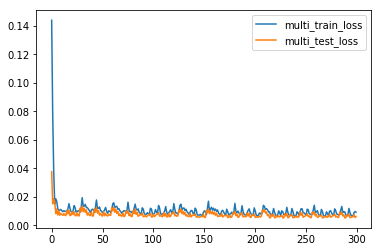

In [46]:
plt.plot(multi_history.history['loss'], label='multi_train_loss')
plt.plot(multi_history.history['val_loss'], label='multi_test_loss')
plt.legend()
plt.show()

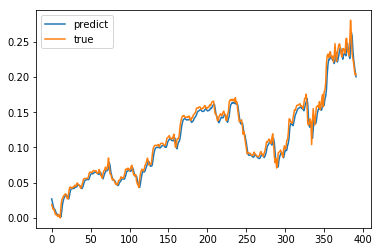

In [47]:
yhat = multi_model.predict(test_X)
plt.plot(yhat, label='predict')
plt.plot(test_y, label='true')
plt.legend()
plt.show()

In [48]:
yhat[:5]

array([[0.02696328],
       [0.02190634],
       [0.01717312],
       [0.01290723],
       [0.01227289]], dtype=float32)

# 저번 철강 스터디때 놓친점!!! scaling의 matrix에 맞추기 위해서 concatenate를 한다

In [49]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
test_X[:5]

array([[0.01346815, 0.01116141, 0.02035579, 0.01176465, 0.00967657,
        0.01843374, 0.0180439 , 0.01965799, 0.02080914, 0.02402361,
        0.02286439, 0.02965134, 0.03088357, 0.03502285, 0.03093646],
       [0.01176465, 0.00967657, 0.01843374, 0.0180439 , 0.01965799,
        0.02080914, 0.02402361, 0.02286439, 0.02965134, 0.03088357,
        0.03502285, 0.03093646, 0.01903071, 0.0155442 , 0.02711857],
       [0.0180439 , 0.01965799, 0.02080914, 0.02402361, 0.02286439,
        0.02965134, 0.03088357, 0.03502285, 0.03093646, 0.01903071,
        0.0155442 , 0.02711857, 0.01522127, 0.01308381, 0.02192191],
       [0.02402361, 0.02286439, 0.02965134, 0.03088357, 0.03502285,
        0.03093646, 0.01903071, 0.0155442 , 0.02711857, 0.01522127,
        0.01308381, 0.02192191, 0.01187858, 0.00828856, 0.020116  ],
       [0.03088357, 0.03502285, 0.03093646, 0.01903071, 0.0155442 ,
        0.02711857, 0.01522127, 0.01308381, 0.02192191, 0.01187858,
        0.00828856, 0.020116  , 0.01250522, 

In [50]:
# invert scaling for forecast -> scaling의 matrix(3x3)에 맞추기 위해서 concatenate를 한다
inv_yhat = concatenate((yhat, test_X[:, 1:3]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat) 
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:3]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [51]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 23.171


In [52]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
# predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([multi_predict_chart, actual_chart])

In [53]:
print ("예측값:", inv_yhat[-3:])

예측값: [783.97705 761.07385 742.9048 ]


In [55]:
print ("실제값:", inv_y[-3:])

실제값: [765.16  749.375 753.42 ]
